In [48]:
import json
import pandas as pd
import regex as rx
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
f = open('file.txt', 'r')
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [5]:
extr = df[df['Nivel de formación'] == "pregrado"]
extr2 = extr['pregrado'].drop_duplicates()
extr2

1                                contaduria publica
2                                           derecho
3                                        psicologia
5                        administracion de empresas
6                  medicina veterinaria y zootecnia
                           ...                     
2920     licenciatura en lenguas extranjeras ingles
2923            licenciatura en educacion religiosa
2926     tecnologia en gestion financiera - virtual
2928    tecnologia en gestion de mercadeo - virtual
2936                           regencia de farmacia
Name: pregrado, Length: 415, dtype: object

In [18]:
ingenieria = extr[extr['pregrado'].str.contains('ingenieria') &
extr['pregrado'].str.contains('sistemas')]
ingenieria2 = ingenieria['pregrado'].drop_duplicates()


In [19]:
def predict_career(language, math, humanity, science, english):
    import random
    
    careers = ['NEGOCIOS INTERNACIONALES', 'INGENIERIA INDUSTRIAL', 'PSICOLOGIA', 'COMUNICACION SOCIAL- PERIODISMO', 'COMUNICACION SOCIAL', 'ADMINISTRACION DE EMPRESAS', 'DERECHO', 'INGENIERIA AMBIENTAL', 'CONTADURIA PUBLICA', 'INGENIERIA MECANICA', 'INGENIERIA CIVIL', 'TRABAJO SOCIAL', 'NUTRICION Y DIETETICA', 'ECONOMIA', 'ODONTOLOGIA', 'ARQUITECTURA', 'LICENCIATURA EN EDUCACION PREESCOLAR', 'SOCIOLOGIA', 'FONOAUDIOLOGIA', 'ADMINISTRACION DE NEGOCIOS', 'INGENIERIA QUIMICA', 'LICENCIATURA EN PEDAGOGÍA INFANTIL', 'CONTADURÍA PÚBLICA', 'MEDICINA VETERINARIA', 'INGENIERIA DE SISTEMAS', 'INGENIERIA ELECTRONICA', 'INGENIERIA DE PETROLEOS', 'INGENIERIA BIOMEDICA', 'INGENIERIA AMBIENTAL Y SANITARIA', 'ENFERMERIA', 'MEDICINA VETERINARIA Y ZOOTECNIA', 'COMERCIO INTERNACIONAL', 'BIOLOGIA', 'INGENIERIA ELECTRICA', 'ADMINISTRACION DE NEGOCIOS INTERNACIONALES', 'INGENIERIA MECATRONICA', 'CIENCIA POLITICA', 'ADMINISTRACIÓN DE EMPRESAS', 'COMUNICACION SOCIAL Y PERIODISMO', 'MEDICINA', 'RELACIONES INTERNACIONALES', 'LICENCIATURA EN PEDAGOGIA INFANTIL', 'ADMINISTRACIÓN EN SALUD OCUPACIONAL', 'CIENCIAS MILITARES', 'MERCADEO', 'INSTRUMENTACION QUIRURGICA', 'DISEÑO INDUSTRIAL', 'LICENCIATURA EN CIENCIAS SOCIALES', 'FISIOTERAPIA', 'DISEÑO GRAFICO', 'PSICOLOGÍA', 'PUBLICIDAD', 'SALUD OCUPACIONAL', 'INGENIERIA AGRONOMICA']

    careers_prob = dict()
    
    for c in careers:
        careers_prob[c] = random.random()
        
        
    return careers_prob


In [21]:
def get_pregrados_info(nombres):
    f = open('file.txt', 'r')
    data = json.load(f)
    tp = pd.DataFrame.from_dict(data) #tabla pregrados
    tp = tp[tp['Nivel de formación'] == "pregrado"]
    tablas = {}
    for nombre in nombres:
        reg = ""
        reg += '('
        for palabra in nombre.split(' '):
            if len(palabra) > 3:
                reg += '.*' + palabra.lower().replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
        reg += '.*)'
        tablas[nombre] = tp[tp['pregrado'].str.match(reg)].to_json(orient="records")
    return tablas 


In [22]:
def sort_porcentajes(diccionario_pregrados):
    return {k: v for k, v in sorted(diccionario_pregrados.items(), key=lambda item: item[1], reverse = True)}

In [23]:
dictionario = predict_career(1,1,1,1,1)
sorted_dict = sort_porcentajes(dictionario)
best_careers = list(sorted_dict)[:3]
best_careers = [career.lower() for career in best_careers]
best_careers

['medicina veterinaria', 'medicina', 'ciencia politica']

In [24]:
get_pregrados_info(best_careers)

udad":"medellin"},{"pregrado":"medicina","Universidad":"universidad cooperativa de colombia - medellin","detalles":"","Descripcion":"la atencion del ser humano con un enfoque integral, abordandolo desde el punto de vista biologico, psicologico y social a nivel individual, familiar y comunitario, aplicando acciones de promocion de la salud, prevencion de la enfermedad, diagnostico, tratamiento y rehabilitacion.","SNIES":"52723","Registro calificado":"resolucion 02019 del 02 de febrero 2016, vigencia 7 a\\u00f1os","Nivel de formaci\\u00f3n":"pregrado","Tipo de formaci\\u00f3n":"universitaria","T\\u00edtulo otorgado":"medico","Modalidad":"presencial","Duraci\\u00f3n":"12 semestres","Cr\\u00e9ditos":"260","Ciudad":"medellin"},{"pregrado":"medicina","Universidad":"universidad pontificia bolivariana","detalles":"desde su inicio, en 1976, el programa de medicina de la upb se ha caracterizado por la formacion integral basada en los principios del humanismo cristiano; esta formacion se refleja 

In [72]:
def get_tables(dictionario):
    sorted_dict = sort_porcentajes(dictionario)
    best_careers = list(sorted_dict)[:3]
    best_careers = [career.lower() for career in best_careers]
    return get_pregrados_info(best_careers)

There are 27813 words in the combination of all cells in column BLOOM.


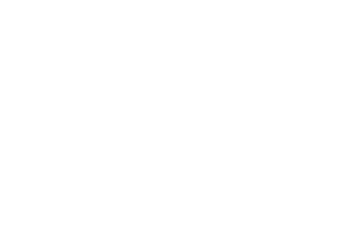

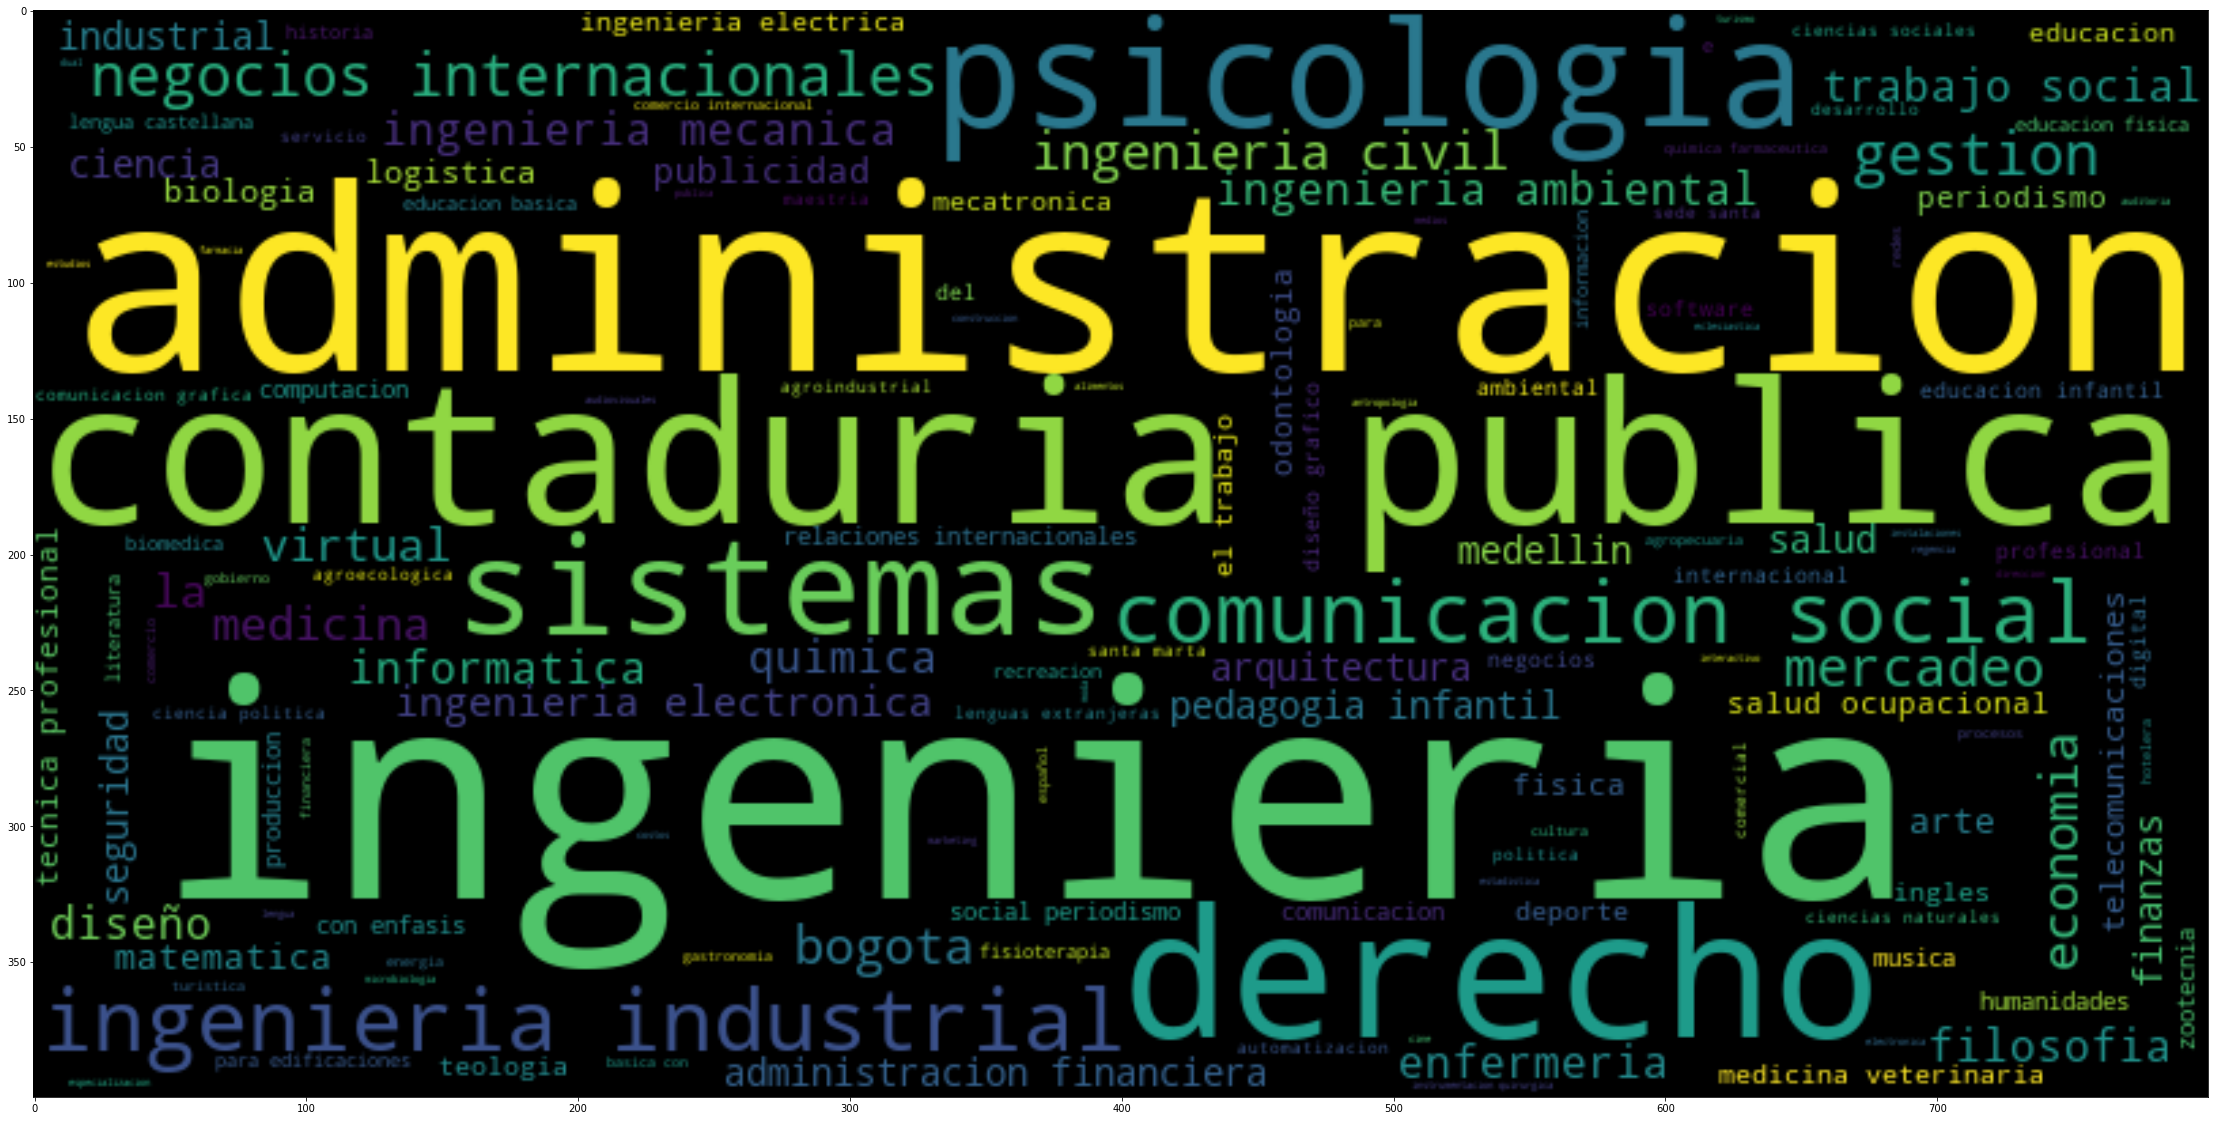

In [82]:
# Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in extr.pregrado.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["de",'y','en','licenciatura','tecnologia','empresas'])

# Generate a word cloud image
ds_mask = np.array(Image.open("a.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
wordcloud.to_file('normal WordCloud.jpg')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

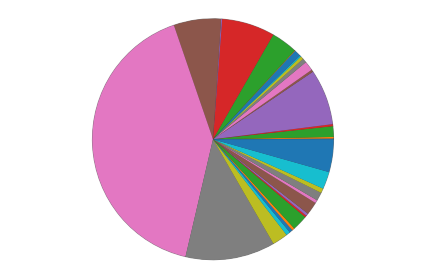

In [81]:
json_fake = {'apartado': 3,
 'arauca': 6,
 'armenia': 42,
 'barrancabermeja': 8,
 'barranquilla': 219,
 'bello': 9,
 'manizales': 37,
 'ibague': 17,
 'girardota': 12,
 'el espinal': 5,
 'cundinamarca': 27,
 'cartago': 2,
 'cartagena': 103,
 'cali': 209,
 'cucuta': 4,
 'bucaramanga': 186,
 'bogota': 1207,
 'medellin': 353,
 'monteria': 61,
 'neiva': 16,
 'palmira': 13,
 'pasto': 10,
 'pereira': 61,
 'popayan': 7,
 'quibdo': 10,
 'santa marta': 51,
 'tolima': 12,
 'tunja': 33,
 'valle': 18,
 'villavicencio': 68,
 'virtual': 129}

labels = json_fake.keys()
sizes = json_fake.values()



patches, texts = plt.pie(sizes, shadow=True, radius = 1000000)
plt.axis('equal')
plt.tight_layout()
plt.show()

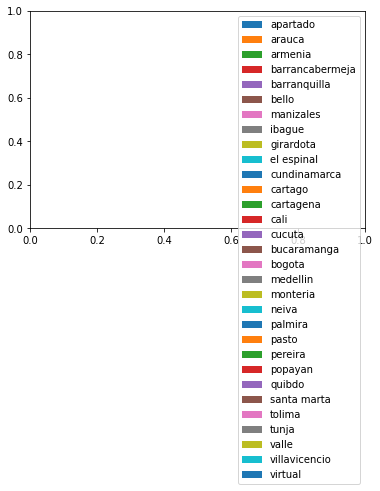

In [76]:
plt.legend(patches, labels, loc="best")